In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from scipy import stats
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [2]:
df1=pd.read_csv("train_v9rqX0R.csv")
df2=pd.read_csv("test_AbJTz2l.csv")

In [3]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df1.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

#### constant features check 

In [5]:
l=[]
for col in df1.columns:
    print(col,':',len(df1[col].unique()))
    if len(df1[col].unique())==1:
        l.append(col)

Item_Identifier : 1559
Item_Weight : 416
Item_Fat_Content : 5
Item_Visibility : 7880
Item_Type : 16
Item_MRP : 5938
Outlet_Identifier : 10
Outlet_Establishment_Year : 9
Outlet_Size : 4
Outlet_Location_Type : 3
Outlet_Type : 4
Item_Outlet_Sales : 3493


#### No constant features found

In [6]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#### duplicates check

In [7]:
df1.shape,df2.shape

((8523, 12), (5681, 11))

In [8]:
df1 = df1.T.drop_duplicates(keep='first').T
df1 = df1.drop_duplicates(keep='first')
df2 = df2.T.drop_duplicates(keep='first').T
df2 = df2.drop_duplicates(keep='first')

In [9]:
df1.shape,df2.shape

((8523, 12), (5681, 11))

#### No duplicates found

### Null values check 

In [10]:
df1.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
df1.isnull().mean()

Item_Identifier              0.000000
Item_Weight                  0.171653
Item_Fat_Content             0.000000
Item_Visibility              0.000000
Item_Type                    0.000000
Item_MRP                     0.000000
Outlet_Identifier            0.000000
Outlet_Establishment_Year    0.000000
Outlet_Size                  0.282764
Outlet_Location_Type         0.000000
Outlet_Type                  0.000000
Item_Outlet_Sales            0.000000
dtype: float64

In [12]:
df2.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

# --------------------------------------------------------------------------------------------------------------

## Null Imputation 

In [13]:
# Outlet_Size is MCAR

In [14]:
df1['Outlet_Size'] = df1['Outlet_Size'].fillna(df1.Outlet_Size.mode()[0])
df2['Outlet_Size'] = df2['Outlet_Size'].fillna(df1.Outlet_Size.mode()[0])

In [15]:
df1.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.0160473,Dairy,249.809,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.14
1,DRC01,5.92,Regular,0.0192782,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.423
2,FDN15,17.5,Low Fat,0.0167601,Meat,141.618,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27
3,FDX07,19.2,Regular,0,Fruits and Vegetables,182.095,OUT010,1998,Medium,Tier 3,Grocery Store,732.38
4,NCD19,8.93,Low Fat,0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.705
5,FDP36,10.395,Regular,0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.609
6,FDO10,13.65,Regular,0.0127411,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.553
7,FDP10,NaN,Low Fat,0.12747,Snack Foods,107.762,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.76
8,FDH17,16.2,Regular,0.0166871,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.6
9,FDU28,19.2,Regular,0.0944496,Frozen Foods,187.821,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.53


In [16]:
df1[df1['Item_Weight'].isnull()].head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.12747,Snack Foods,107.762,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.76
18,DRI11,NaN,Low Fat,0.0342377,Hard Drinks,113.283,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.67


In [17]:
# Item_Weight is MNAR as it directly correlates with Outlet_Establishment_Year

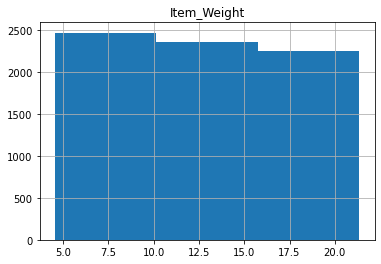

In [18]:
df1['Item_Weight']=df1['Item_Weight'].astype(float)
hist = df1.hist(bins=3)

#### Variable Item_Weight is not a Normal Distribution so implementing Arbitrary value Imputation

#### Cannot implement End Tail Imputation because it is not normally distributed 

In [19]:
#df1['Item_Weight'] = df1['Item_Weight'].fillna(df1.Item_Weight.mean())
#df2['Item_Weight'] = df2['Item_Weight'].fillna(df1.Item_Weight.mean())

In [20]:
df1['Item_Weight'] = df1['Item_Weight'].fillna(value=0)
df2['Item_Weight'] = df2['Item_Weight'].fillna(value=0)

In [21]:
df1.shape

(8523, 12)

In [22]:
df1.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.0160473,Dairy,249.809,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.14
1,DRC01,5.92,Regular,0.0192782,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.423


# -------------------------------------------------------------------------------------------------------------

### handling Item_Fat_Content

In [23]:
df1.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [24]:
df1['Item_Fat_Content']=df1['Item_Fat_Content'].replace('reg','Regular')
df1['Item_Fat_Content']=df1['Item_Fat_Content'].replace('LF','Low Fat')
df1['Item_Fat_Content']=df1['Item_Fat_Content'].replace('low fat','Low Fat')
df2['Item_Fat_Content']=df2['Item_Fat_Content'].replace('reg','Regular')
df2['Item_Fat_Content']=df2['Item_Fat_Content'].replace('LF','Low Fat')
df2['Item_Fat_Content']=df2['Item_Fat_Content'].replace('low fat','Low Fat')

In [25]:
df1.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [26]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.0160473,Dairy,249.809,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.14
1,DRC01,5.92,Regular,0.0192782,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.423
2,FDN15,17.50,Low Fat,0.0167601,Meat,141.618,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27
3,FDX07,19.20,Regular,0,Fruits and Vegetables,182.095,OUT010,1998,Medium,Tier 3,Grocery Store,732.38
4,NCD19,8.93,Low Fat,0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.705


### Handling Categorical Data and numerical data

In [27]:
df1.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility               object
Item_Type                     object
Item_MRP                      object
Outlet_Identifier             object
Outlet_Establishment_Year     object
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales             object
dtype: object

In [28]:
q=type(df1['Item_Weight'][0])

In [29]:
#label encoding example
le = preprocessing.LabelEncoder()
le.fit(df1['Item_Type'])
Item_Type = dict(zip(le.classes_, le.transform(le.classes_)))
print(Item_Type)

{'Baking Goods': 0, 'Breads': 1, 'Breakfast': 2, 'Canned': 3, 'Dairy': 4, 'Frozen Foods': 5, 'Fruits and Vegetables': 6, 'Hard Drinks': 7, 'Health and Hygiene': 8, 'Household': 9, 'Meat': 10, 'Others': 11, 'Seafood': 12, 'Snack Foods': 13, 'Soft Drinks': 14, 'Starchy Foods': 15}


In [30]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.0160473,Dairy,249.809,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.14
1,DRC01,5.92,Regular,0.0192782,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.423
2,FDN15,17.50,Low Fat,0.0167601,Meat,141.618,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27
3,FDX07,19.20,Regular,0,Fruits and Vegetables,182.095,OUT010,1998,Medium,Tier 3,Grocery Store,732.38
4,NCD19,8.93,Low Fat,0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.705


In [31]:
# One hot Encoding not needed
'''y = pd.get_dummies(df1.Item_Fat_Content, prefix='Enc')
df1 = pd.concat([df1, y], axis=1)
df1=df1.drop('Item_Fat_Content',1)
z = pd.get_dummies(df2.Item_Fat_Content, prefix='Enc')
df2 = pd.concat([df2, z], axis=1)
df2=df2.drop('Item_Fat_Content',1)'''

"y = pd.get_dummies(df1.Item_Fat_Content, prefix='Enc')\ndf1 = pd.concat([df1, y], axis=1)\ndf1=df1.drop('Item_Fat_Content',1)\nz = pd.get_dummies(df2.Item_Fat_Content, prefix='Enc')\ndf2 = pd.concat([df2, z], axis=1)\ndf2=df2.drop('Item_Fat_Content',1)"

In [32]:

for i in df1:
    if type(df1[i][0])==float or type(df1[i][0])==int or type(df1[i][0])==q:
        df1[i]=df1[i].astype(float)
    else:
        df1[i]=df1[i].astype('category').cat.codes
        
for i in df2:
    if type(df2[i][0])==float or type(df2[i][0])==int:
        df2[i]=df2[i].astype(float)
    else:
        df2[i]=df2[i].astype('category').cat.codes

In [33]:
df1.dtypes

Item_Identifier                int16
Item_Weight                  float64
Item_Fat_Content                int8
Item_Visibility              float64
Item_Type                       int8
Item_MRP                     float64
Outlet_Identifier               int8
Outlet_Establishment_Year    float64
Outlet_Size                     int8
Outlet_Location_Type            int8
Outlet_Type                     int8
Item_Outlet_Sales            float64
dtype: object

In [34]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999.0,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009.0,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999.0,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998.0,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987.0,0,2,1,994.7052


In [35]:
df1['Outlet_Establishment_Year']=df1['Outlet_Establishment_Year'].astype('category').cat.codes
df2['Outlet_Establishment_Year']=df2['Outlet_Establishment_Year'].astype('category').cat.codes

In [36]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,4,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,8,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,4,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,3,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1,0,2,1,994.7052


# ---------------------------------------------------------------------------------------------------------------

In [37]:
df1.shape

(8523, 12)

#### Quasi Constant handling with threshold=0.1

<AxesSubplot:>

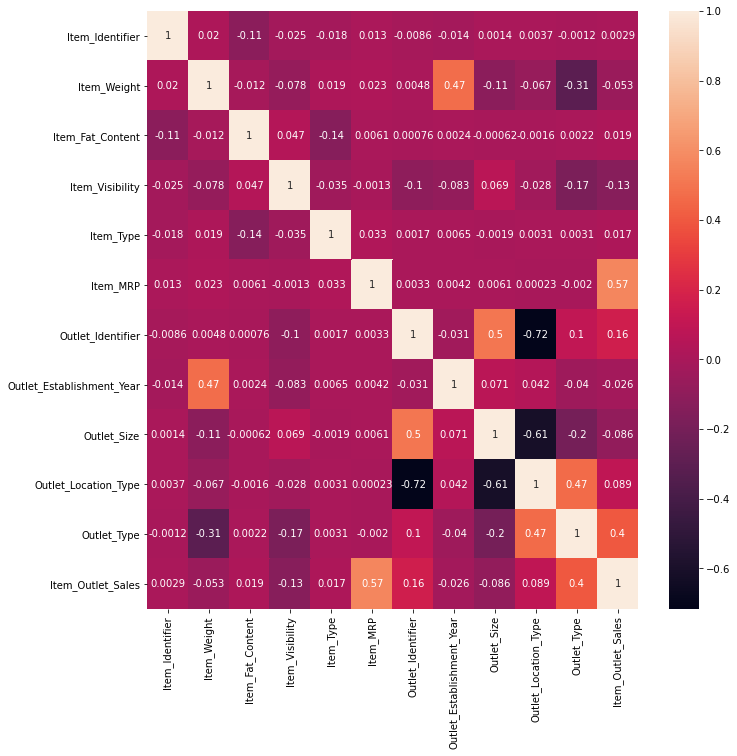

In [38]:
corrmat = df1.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat,annot=True)

In [40]:
sel = VarianceThreshold(0.1)  # 0.1 indicates 90% of observations approximately

sel.fit(df1)
(sel.get_support())
print(
    len([
        x for x in df1.columns
        if x not in df1.columns[sel.get_support()]
    ]))

quasi_drop=[x for x in df1.columns if x not in df1.columns[sel.get_support()]]
print(quasi_drop)
df1=df1.drop(quasi_drop,1)

1
['Item_Visibility']


In [41]:
df1.shape

(8523, 11)

In [42]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,4,249.8092,9,4,1,0,1,3735.1380
1,8,5.92,1,14,48.2692,3,8,1,2,2,443.4228
2,662,17.50,0,10,141.6180,9,4,1,0,1,2097.2700
3,1121,19.20,1,6,182.0950,0,3,1,2,0,732.3800
4,1297,8.93,0,9,53.8614,1,1,0,2,1,994.7052


##### Correlation check 

<AxesSubplot:>

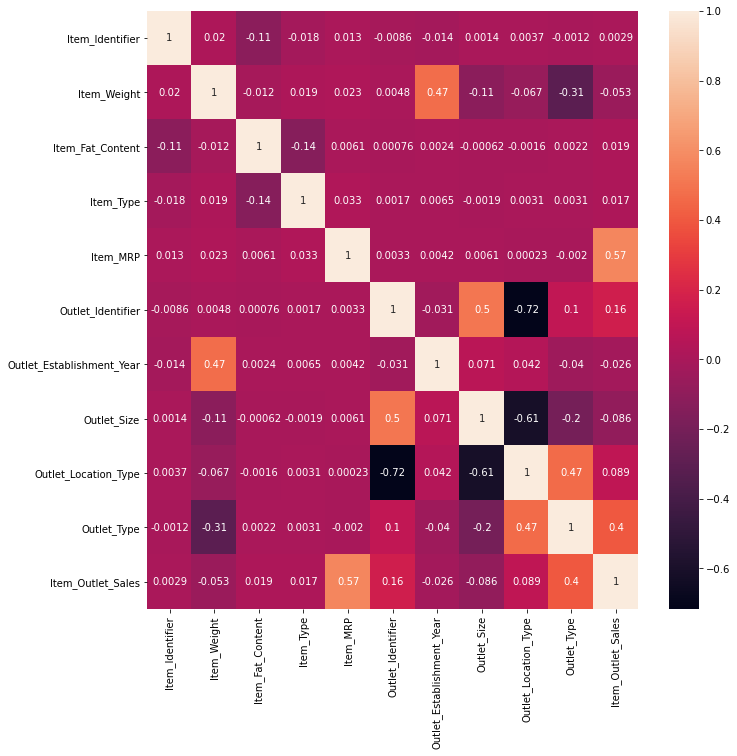

In [43]:
corrmat = df1.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat,annot=True)

In [46]:
corr_matrix = df1.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
to_drop

['Outlet_Location_Type']

In [293]:
df1.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.019782,-0.114660,-0.017973,0.012853,-0.008602,-0.014288,0.001389,0.003656,-0.001178,0.002869
Item_Weight,0.019782,1.000000,-0.011943,0.019390,0.022859,0.004822,0.471542,-0.113402,-0.067122,-0.308917,-0.053222
Item_Fat_Content,-0.114660,-0.011943,1.000000,-0.139434,0.006063,0.000764,0.002447,-0.000622,-0.001598,0.002199,0.018719
Item_Type,-0.017973,0.019390,-0.139434,1.000000,0.032651,0.001656,0.006527,-0.001859,0.003084,0.003053,0.017048
Item_MRP,0.012853,0.022859,0.006063,0.032651,1.000000,0.003319,0.004162,0.006059,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.008602,0.004822,0.000764,0.001656,0.003319,1.000000,-0.030969,0.504603,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,-0.014288,0.471542,0.002447,0.006527,0.004162,-0.030969,1.000000,0.070786,0.042005,-0.040040,-0.025525
Outlet_Size,0.001389,-0.113402,-0.000622,-0.001859,0.006059,0.504603,0.070786,1.000000,-0.614311,-0.201483,-0.086182
Outlet_Location_Type,0.003656,-0.067122,-0.001598,0.003084,0.000232,-0.716176,0.042005,-0.614311,1.000000,0.467219,0.089367
Outlet_Type,-0.001178,-0.308917,0.002199,0.003053,-0.001975,0.099873,-0.040040,-0.201483,0.467219,1.000000,0.401522


<AxesSubplot:>

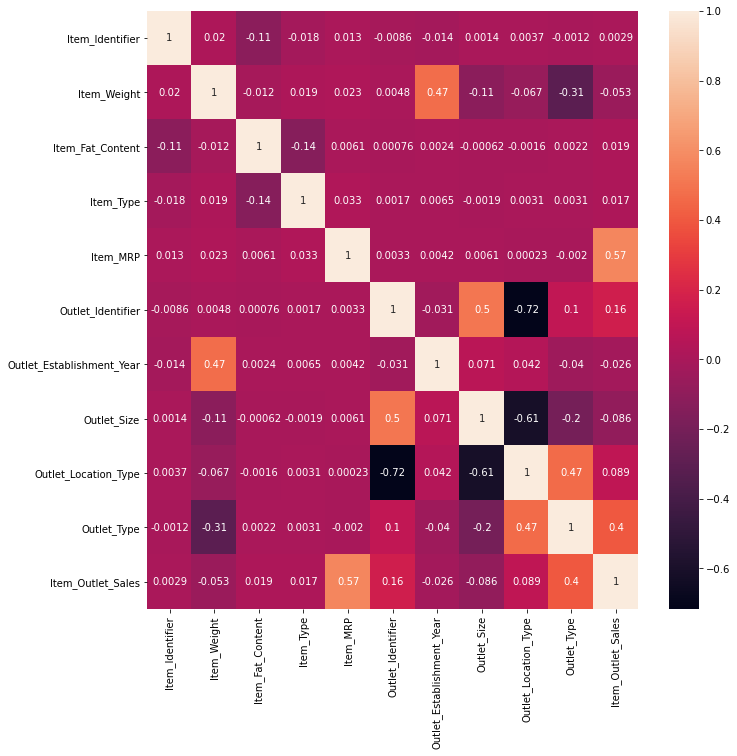

In [294]:
corrmat = df1.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat,annot=True)

##### Dropping Correlated variable

In [295]:
df1=df1.drop(to_drop,1)

<AxesSubplot:>

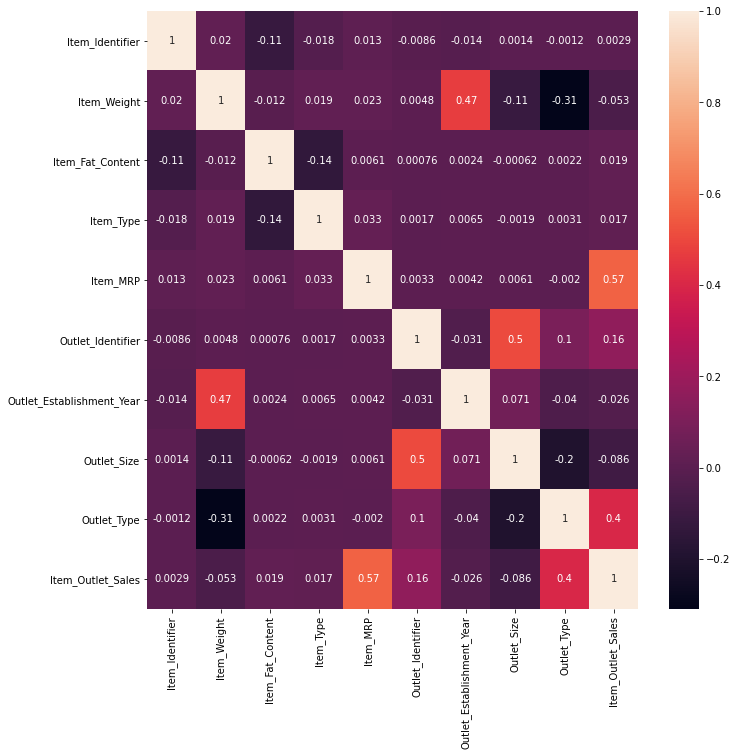

In [296]:
corrmat = df1.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat,annot=True)

##### no correlation exists now

### Data describe

In [297]:
df1.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,10.650590,0.352693,7.226681,140.992782,4.722281,3.790684,1.170832,1.201220,2181.288914
std,449.222377,6.431899,0.477836,4.209990,62.275067,2.837201,2.730322,0.600327,0.796459,1706.499616
min,0.000000,0.000000,0.000000,0.000000,31.290000,0.000000,0.000000,0.000000,0.000000,33.290000
25%,395.500000,6.650000,0.000000,4.000000,93.826500,2.000000,1.000000,1.000000,1.000000,834.247400
50%,783.000000,11.000000,0.000000,6.000000,143.012800,5.000000,4.000000,1.000000,1.000000,1794.331000
75%,1167.000000,16.000000,1.000000,10.000000,185.643700,7.000000,6.000000,2.000000,1.000000,3101.296400
max,1558.000000,21.350000,1.000000,15.000000,266.888400,9.000000,8.000000,2.000000,3.000000,13086.964800


array([[<AxesSubplot:title={'center':'Item_Identifier'}>,
        <AxesSubplot:title={'center':'Item_Weight'}>,
        <AxesSubplot:title={'center':'Item_Fat_Content'}>],
       [<AxesSubplot:title={'center':'Item_Type'}>,
        <AxesSubplot:title={'center':'Item_MRP'}>,
        <AxesSubplot:title={'center':'Outlet_Identifier'}>],
       [<AxesSubplot:title={'center':'Outlet_Establishment_Year'}>,
        <AxesSubplot:title={'center':'Outlet_Size'}>,
        <AxesSubplot:title={'center':'Outlet_Type'}>],
       [<AxesSubplot:title={'center':'Item_Outlet_Sales'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

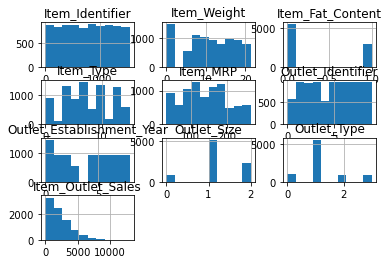

In [298]:
df1.hist()

In [299]:
#sns.pairplot(df1[['Item_Weight','Item_MRP','Outlet_Identifier','Item_Outlet_Sales']])

In [300]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,4,249.8092,9,4,1,1,3735.1380
1,8,5.92,1,14,48.2692,3,8,1,2,443.4228
2,662,17.50,0,10,141.6180,9,4,1,1,2097.2700
3,1121,19.20,1,6,182.0950,0,3,1,0,732.3800
4,1297,8.93,0,9,53.8614,1,1,0,1,994.7052


##### average sales of each item using groupby 

In [301]:
meansales=df1.groupby('Item_Identifier').mean()['Item_Outlet_Sales']
meansales

Item_Identifier
0       1843.600200
1       2246.218971
2       2614.430150
3       1518.024000
4       2428.838400
           ...     
1554    1807.647000
1555    1827.487840
1556    3839.801760
1557    3014.742400
1558    3249.104000
Name: Item_Outlet_Sales, Length: 1559, dtype: float64

In [302]:
#engineering a feature
df1['mean sales of item']=df1['Item_Identifier'].map(dict(df1.groupby('Item_Identifier').mean()["Item_Outlet_Sales"]))

In [303]:
for i,j in df1.groupby('Outlet_Identifier'):
    print(i)
    #print(j.groupby('Item_Identifier').mean()['Item_Outlet_Sales'])
    print(j.Item_Identifier.value_counts())
    print('------------------------------------------------------------------------------------------------')
    print('------------------------------------------------------------------------------------------------')
    print('------------------------------------------------------------------------------------------------')
    print('------------------------------------------------------------------------------------------------')

0
1023    1
276     1
576     1
1305    1
1304    1
       ..
573     1
574     1
35      1
779     1
0       1
Name: Item_Identifier, Length: 555, dtype: int64
------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------
1
1557    1
514     1
534     1
532     1
531     1
       ..
1047    1
1044    1
1040    1
1038    1
0       1
Name: Item_Identifier, Length: 932, dtype: int64
------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------

<AxesSubplot:>

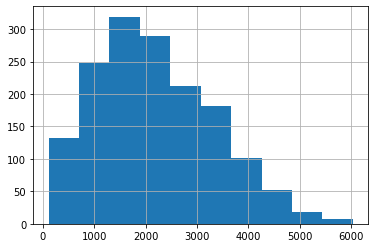

In [304]:
meansales.hist()

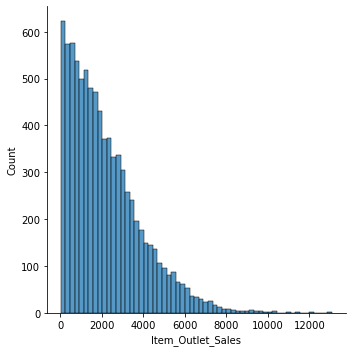

In [305]:
sns.displot(df1['Item_Outlet_Sales'])

In [306]:
a=df1['Item_Outlet_Sales'].copy()
df1.drop('Item_Outlet_Sales',1,inplace=True)
df1['Item_Outlet_Sales']=a.copy()

## scatter plot and Z score for Outliers

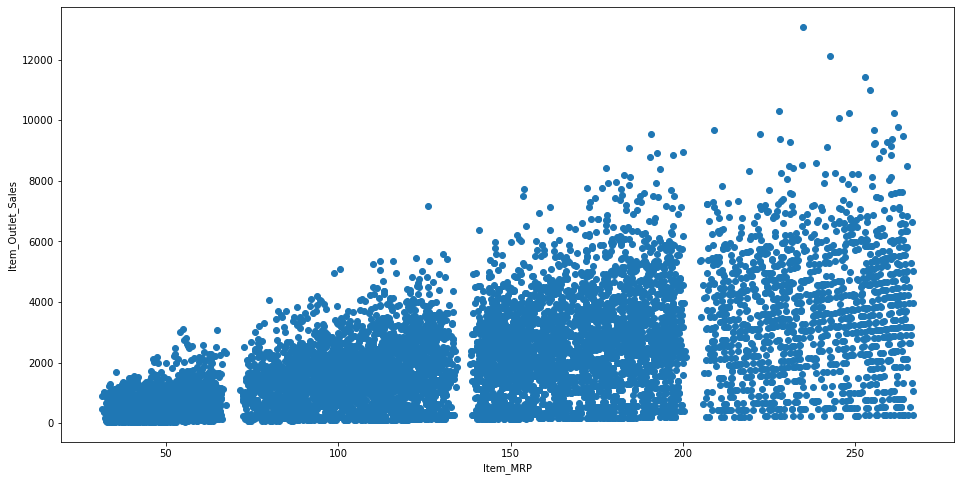

In [307]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df1['Item_MRP'], df1['Item_Outlet_Sales'])
ax.set_xlabel('Item_MRP')
ax.set_ylabel('Item_Outlet_Sales')
plt.show()

In [308]:
df1.shape

(8523, 11)

### Z score = (Observation — Mean)/Standard Deviation

#### z = (X — μ) / σ 

In [309]:
outliers=[]
m=df1['Item_Outlet_Sales'].mean()
s=df1['Item_Outlet_Sales'].std()
threshold=3
for i in df1['Item_Outlet_Sales']:
    z_score= (i - m)/s
    if np.abs(z_score) > threshold:
            outliers.append(i)
            df1.drop((df1[df1['Item_Outlet_Sales']==i].index)[0],inplace=True)

In [310]:
len(outliers)

90

In [311]:
df1.shape

(8433, 11)

In [312]:
outliers[:5]

[7968.2944, 7370.406, 7452.9652, 7696.648, 9267.936]

In [313]:
df2.shape

(5681, 11)

In [314]:
# z score implementation using scipy.stats
z_scores = stats.zscore(df1)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df1 = df1[filtered_entries]

z_scores_test = stats.zscore(df2)
abs_z_scores_test = np.abs(z_scores_test)
filtered_entries_test = (abs_z_scores_test < 3).all(axis=1)
df2 = df2[filtered_entries_test]

In [315]:
df1.shape,df2.shape

((8364, 11), (5600, 11))

In [316]:
# outliers dropped!

### Feature Scaling

In [317]:
from sklearn.preprocessing import MinMaxScaler

In [318]:
def scale(data):
    for cols in data:
        scaler = MinMaxScaler()
        data[cols]=scaler.fit_transform(data[[cols]])

In [319]:
scale(df1)
scale(df2)

In [320]:
df1[df1.columns[:-1]].head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Type,mean sales of item
0,0.100128,0.435597,0.0,0.266667,0.927507,1.000000,0.5,0.5,0.333333,0.959133
1,0.005135,0.277283,1.0,0.933333,0.072068,0.333333,1.0,0.5,0.666667,0.141641


### Splitting the data into Validation and Train Sets

In [321]:
from sklearn.model_selection import train_test_split
X_Train, X_Val, Y_Train, Y_Val = train_test_split(df1[df1.columns[:-1]],df1[df1.columns[-1]], test_size = 0.2, random_state = 50)

In [322]:
X_Train.shape,X_Val.shape

((6691, 10), (1673, 10))

In [323]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=9,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0,
         verbose=2,
         n_jobs=-1)

In [324]:
sfs.fit(X_Train, Y_Train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2021-01-24 02:13:36] Features: 1/9 -- score: 0.40673351356988974[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2021-01-24 02:13:36] Features: 2/9 -- score: 0.5327308970833147[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2021-01-24 02:13:37] Features: 3/9 -- score: 0.5473993113018011[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of   7 |

SequentialFeatureSelector(cv=0, estimator=LinearRegression(), k_features=9,
                          n_jobs=-1, scoring='r2', verbose=2)

In [175]:
sfs.k_feature_names_  

('Item_Weight',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Type',
 'mean sales of item')

In [72]:
X_Train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Type,mean sales of item
2117,0.559050,0.477518,1.0,0.333333,0.455834,0.888889,0.250,1.0,0.333333,0.406656
4073,0.254172,0.515222,1.0,0.333333,0.526205,1.000000,0.500,0.5,0.333333,0.414201
972,0.507702,0.784543,0.0,0.866667,0.033499,0.777778,0.625,0.5,0.333333,0.092642
4803,0.979461,0.000000,0.0,0.600000,0.804571,0.555556,0.000,0.5,1.000000,0.479195
3754,0.399230,0.522248,1.0,0.866667,0.579754,0.777778,0.625,0.5,0.333333,0.235162


In [73]:
Y_Train

2117    0.345208
4073    0.086863
972     0.041187
4803    0.610775
3754    0.418212
          ...   
8419    0.133223
6333    0.172262
8482    0.106969
6373    0.386395
5708    0.574858
Name: Item_Outlet_Sales, Length: 6691, dtype: float64

### Feature Selection 

In [74]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [75]:
bestfeatures = SelectKBest(score_func=f_regression, k=10)
fit = bestfeatures.fit(X_Train,Y_Train)

In [76]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_Train.columns)

In [77]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [78]:
#raw scores using univariate selection
featureScores

,Specs,Score
0,Item_Identifier,0.035628
1,Item_Weight,0.237369
2,Item_Fat_Content,0.890337
3,Item_Type,1.864830
4,Item_MRP,3074.341456
5,Outlet_Identifier,219.852400
6,Outlet_Establishment_Year,1.783000
7,Outlet_Size,48.309041
8,Outlet_Type,1075.601308
9,mean sales of item,4585.865769


##### more the score, better is the feature

In [79]:
print(featureScores.nlargest(5,'Score'))  #print 5 best features

                Specs        Score
9  mean sales of item  4585.865769
4            Item_MRP  3074.341456
8         Outlet_Type  1075.601308
5   Outlet_Identifier   219.852400
7         Outlet_Size    48.309041
